[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Computador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


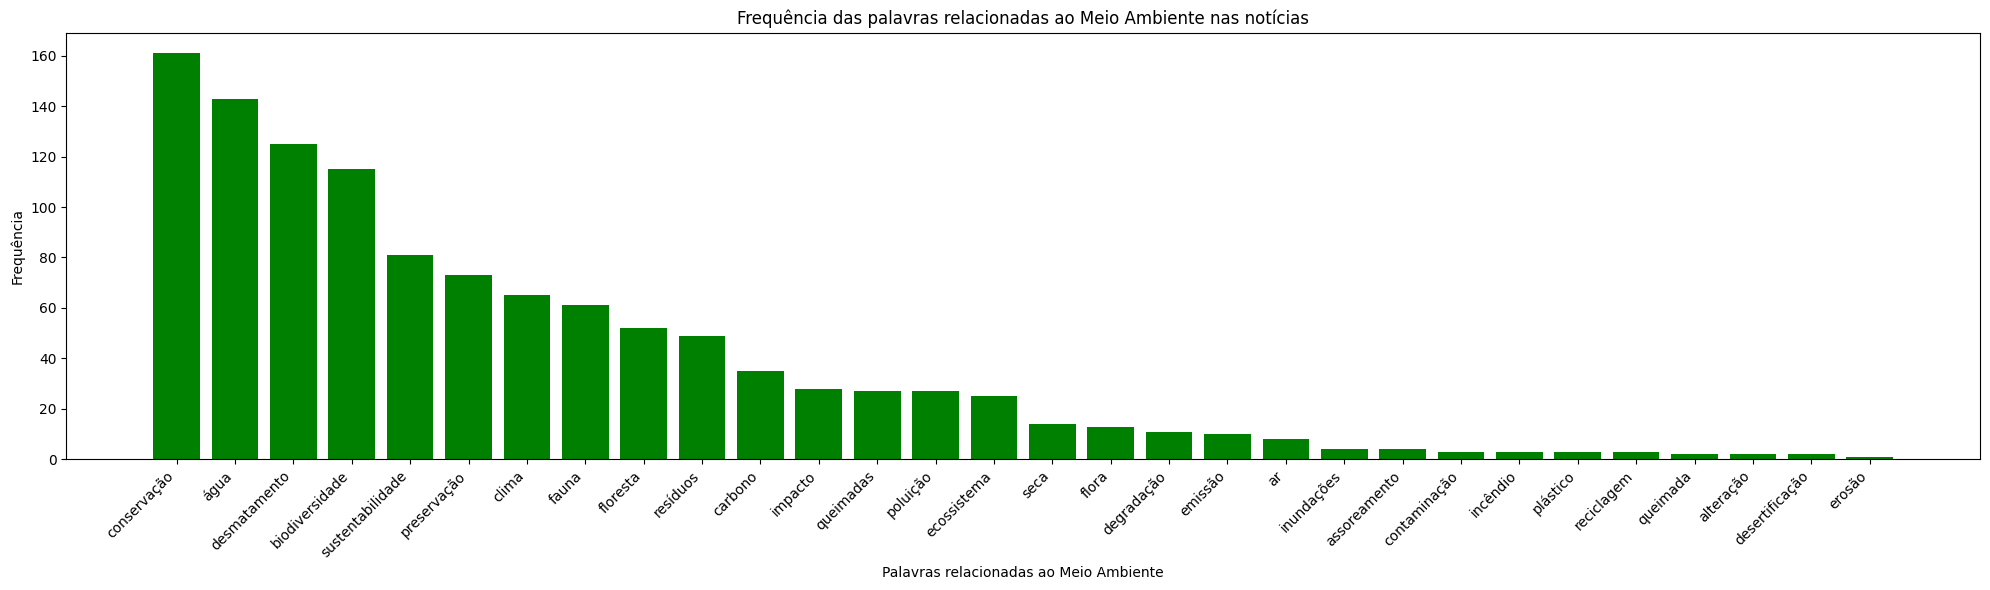

In [1]:
import feedparser
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

# Função para obter o conteúdo HTML de um link
def get_html_content(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Lança uma exceção se a solicitação falhar
        return response.text
    except requests.RequestException as e:
        print(f"Erro ao obter o conteúdo HTML do URL {url}: {e}")
        return None

# Função para coletar todas as palavras de um texto
def collect_words(text):
    words = word_tokenize(text)  # Tokeniza o texto em palavras
    words = [word.lower() for word in words if word.isalnum()]  # Remove pontuações e converte para minúsculas
    return words  # Retorna a lista de palavras

# Função para imprimir as principais notícias de um feed RSS
def print_top_news_rss(site_name, url, max_news=10):
    try:
        feed = feedparser.parse(url)  # Analisa o feed RSS
        print(f"Principais notícias de {site_name}:")
        print("="*50)
        for i, entry in enumerate(feed.entries[:max_news]):
            print(f"Notícia {i+1}:")
            print(entry.title)  # Imprime o título da notícia
            print(entry.link)  # Imprime o link da notícia
            print("-"*50)
    except Exception as e:
        print(f"Erro ao processar o feed RSS {url}: {e}")

# Lista de feeds RSS dos sites que serão buscadas as notícias
rss_feeds = {
    "Greenpeace Brasil": "https://www.greenpeace.org/brasil/feed/",
    "G1 - Natureza": "https://g1.globo.com/rss/g1/natureza/",
    "Instituto Akatu": "https://www.akatu.org.br/feed/",
    "O Eco": "https://www.oeco.org.br/feed/",
}

# Lista de palavras relacionadas ao meio ambiente que queremos buscar
environment_related_words = [
    "queimadas", "enchente", "poluição", "desmatamento", "biodiversidade", "sustentabilidade",
    "reciclagem", "desflorestamento", "aquecimento global", "preservação", "conservação",
    "impacto ambiental", "energia renovável", "carbono", "plástico", "floresta", "água",
    "ar", "fauna", "flora", "clima", "contaminação", "resíduos", "ecossistema",
    "despejo ilegal de resíduos", "extração ilegal de madeira", "caça furtiva", "pesca predatória",
    "tráfico de animais silvestres", "despejo de produtos químicos tóxicos", "vazamento de petróleo",
    "incêndios criminosos", "corrupção ambiental", "desvio de recursos naturais",
    "exploração ilegal de recursos naturais", "contrabando de espécies protegidas", "urbanização descontrolada",
    "construções irregulares em áreas de preservação", "agronegócio predatório", "mineração ilegal",
    "pescaria ilegal em áreas protegidas", "envenenamento de rios e mananciais", "contaminação de alimentos",
    "desmatamento para fins comerciais", "uso indiscriminado de agrotóxicos", "sobreexplotação de recursos hídricos",
    "evasão de fiscalização ambiental", "suborno para autorizações ambientais", "impacto ambiental de indústrias poluidoras",
    "destruição de habitats naturais", "assoreamento de rios e lagos", "atropelamento de fauna silvestre",
    "derramamento de lixo em áreas protegidas", "exploração sexual de recursos naturais",
    "pesquisa científica ilegal em fauna e flora", "furtos de patrimônio natural",
    "introdução de espécies exóticas invasoras", "grilagem de terras", "contrabando de produtos florestais",
    "roubo de madeira", "extração ilegal de areia e cascalho", "modificação genética de espécies",
    "descarte irregular de produtos eletrônicos", "produção clandestina de carvão vegetal",
    "pesca com explosivos ou veneno",
    "desmatamento", "queimada", "incêndio", "inundações", "poluente", "resíduo", "erosão", "desertificação",
    "contaminante", "contaminação", "degradação", "seca", "salinização", "desertificação", "assoreamento",
    "impacto", "alteração", "degradante", "emissão"
]

# Coleta todas as palavras das notícias
all_words = []
for site, rss_feed in rss_feeds.items():
    feed = feedparser.parse(rss_feed)  # Analisa o feed RSS
    for entry in feed.entries:
        html_content = get_html_content(entry.link)  # Obtém o conteúdo HTML da página
        if html_content:
            soup = BeautifulSoup(html_content, 'html.parser')  # Analisa o HTML da página
            text = soup.get_text()  # Obtém o texto da página
            words = collect_words(text)  # Coleta as palavras do texto
            all_words.extend(words)  # Adiciona as palavras à lista de todas as palavras

# Remover stopwords (palavras comuns que não contribuem significativamente para o significado)
stop_words = set(stopwords.words('portuguese'))  # Obtém as stopwords em português
filtered_words = [word for word in all_words if word not in stop_words]  # Remove as stopwords das palavras coletadas

# Identificar e contar as palavras relacionadas ao meio ambiente
environment_words = [word for word in filtered_words if word in environment_related_words]
word_freq = nltk.FreqDist(environment_words)

# Obter as palavras mais comuns e suas frequências
top_words = word_freq.most_common(40)
top_words, frequencies = zip(*top_words)  # Separa as palavras e frequências em duas listas

# Plotar o gráfico de barras das palavras mais comuns relacionadas ao meio ambiente
plt.figure(figsize=(20, 6))
plt.bar(top_words, frequencies, color='green')
plt.xlabel('Palavras relacionadas ao Meio Ambiente')
plt.ylabel('Frequência')
plt.title('Frequência das palavras relacionadas ao Meio Ambiente nas notícias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
